Os seguintes scripts são uma versão Python do curso de Machine Learning do professor Andrew Ng da universidade de Stanford leccionado na plataforma Coursera.

**Nota: Todos os dados e estrutura do exercício pertencem à Universidade de Stanford**

**Ressalva:** Os scripts não estão implementados de forma modular para todas as funções serem consultadas no mesmo Jupyter Notebook - ao contrário da implementação Octave.

# Exercício 1 - Máquinas de Vector Suporte

In [1]:
# Importar o numpy para lidar com matrizes e vectores
import numpy as np
# Importar o pandas para ler ficheiros
import pandas as pd
# Importar o matplotlib 
import matplotlib.pyplot as plt

# Importar o módulo matemático
import math 

# Importar a função de optimização do scipy
from scipy import optimize, io
from scipy.ndimage import rotate

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Propriedade Inline do matplotlib
%matplotlib inline

In [3]:
# Carregar dados do exercício
ex6_ficheiro = io.loadmat('ex6data1.mat')
X = np.array(ex6_ficheiro['X'])
y = np.array(ex6_ficheiro['y'])

In [5]:
def graficoDados(
    X: np.array,
    y: np.array
) -> None:
    '''
    Produz gráfico 2D com o target mapeado 
    para os simbolos de o e +.
        
    Args:
        X(np.array): Vector de features.
        y(np.array): Valores target para cada observação.
    Retorna:
        None        
    '''
    plt.scatter(X[(y==0).ravel(),0], X[(y==0).ravel(),1], marker='o', facecolors='yellow', edgecolors='black')
    plt.scatter(X[(y==1).ravel(),0], X[(y==1).ravel(),1], marker='+', c='black')

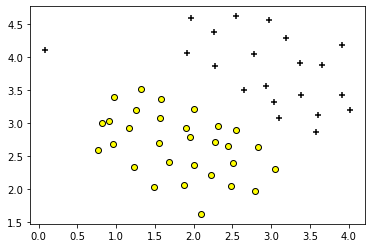

In [6]:
graficoDados(X.reshape(len(X),2),y)

Observem o outlier no ponto **X~0.01 e y~4.2.** Este outlier será um excelente exemplo para vermos o funcionamento do treino da máquina de vectores suporte (e especialmente no parâmetro de regularização C.)

In [7]:
# Definir o parâmetro C
C = 1

def treinarSVM(
    X: np.array, 
    y: np.array, 
    C: int,  
    max_iter: int
) -> None:
    '''
    Função que treina o classificador que recorre a máquina
    de vectores supporte - usamos a library sklearn.
    
    A implementação no sklearn converge de forma mais lenta
    do que na implementação do prof. Andrew em octave então 
    aumentamos o número de iteracções.
    
    Args:
        X(np.array): Vector original de features.
        y(np.array): Vector com os valores target de 
        cada observação.
        C(int): Parâmetros de regularização.
        max_iter(int): Número de iteracções.
    Returns:
        w(np.array): Pesos das variáveis.
        b(np.array): Intercept.
    '''
    
    classificador_svm = LinearSVC(C=C, max_iter = max_iter)
    classificador_svm.fit(X,y.reshape(len(y),))     
    
    # Obter os coeficientes (pesos para as variáveis e intercept)
    # dos thetas treinado pela máquina de vectores suporte.
    w = classificador_svm.coef_  
    b = classificador_svm.intercept_  
    
    return w,b

In [8]:
def visualizarFronteiraLinear(
    X: np.array, 
    y: np.array, 
    w: np.array, 
    b: np.array
) -> None:
    '''
    Mapeia a fronteira de decisão treinada pela máquina
    de vectores suporte.
    
    Args:
        X(np.array): Vector original de features.
        y(np.array): Valores target.
        w(np.array): Peso das variáveis resultantes 
        do treino da máquina de vectores suporte.
        b(np.array): Valor intercept. 
    Returns:
        None
    '''
    
    xp = np.linspace(min(X[:,0]), max(X[:,0]),100)
    yp = - (w[0,0]*xp + b)/w[0,1]
    
    graficoDados(X, y)
    plt.plot(xp,yp)
    

In [13]:
# Obter os pesos do treino da máquina
# de vectores suporte
w,b = treinarSVM(X,y,C,100000)

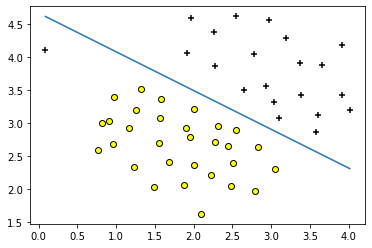

In [14]:
visualizarFronteiraLinear(X, y, w, b)

Com um C baixo, relaxamos a fronteira de decisão linear, permitindo ao algoritmo classificar erradamente o outlier (isto não é necessariamente mau já que até podemos prevenir algum overfit aos dados de treino.) - O C comporta-se de forma inversa ao parâmetro lambda duma regressão logística.
<br>
**O que acontece se usarmos um C mais elevado?**

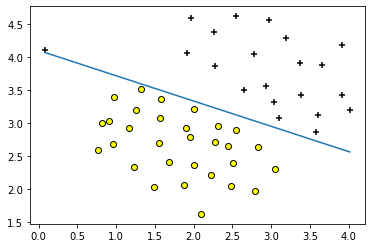

In [17]:
C = 100
# Obter novos pesos do modelo treinado
w,b = treinarSVM(X,y,C,100000)
visualizarFronteiraLinear(X, y, w, b)

Com um C mais elevado, relaxámos a regularização do modelo. Neste caso o algoritmo tentou manipular a fronteira de decisão linear de maneira a classificar correctamente o outlier.

# Exercício 2 - Implementar um Kernel Gaussiano

O exemplo que visualizamos recorria a uma decisão linear - produzing uma fronteira muito semelhante ao que seria produzido por uma regressão logística. Um dos grandes poderes da máquina de vectores support é a construção de hiperplanos não lineares para a construção de outro tipo de fronteiras de decisão e outro tipo de funções.

No exemplo de seguida vamos usar um dos "kernel" mais famosos das máquinas de vectores suporte - um "kernel" gaussiano.

<img src="assets/GaussianKernel.JPG">

Usando alguns dados dummy:

In [20]:
x1 = np.array([[1,2,1]])
x2 = np.array([[0,4,-1]])

In [21]:
def kernelGaussiano(
    x1: np.array, 
    x2: np.array, 
    sigma: int
) -> np.array:
    '''
    Avalia o kernel gaussiano usando as features x1 
    e x2 com o valor sigma.
    
    x1(np.array): Vectores da feature dummy 1.
    x2(np.array): Vectores da feature dummy 2.
    sigma(int): Parâmetro sigma.
    
    Return:
        sim(np.array): Resultado do kernel gaussiano.
    '''
    sim = math.exp((-(x1-x2)**2).sum()/(2*sigma**2))
    return sim

In [22]:
sigma = 2
sim = kernelGaussiano(x1,x2,sigma)

print('O kernel gaussiano entre [1,2,1] e [0,4,-1] com um sigma = {} é {}'.format(sigma,sim))

O kernel gaussiano entre [1,2,1] e [0,4,-1] com um sigma = 2 é 0.32465246735834974


E agora, visualizando o comportamento de um kernel gaussiano em dados concretos:

In [23]:
# Usar o scipy para carregar o ficheiro
ex6_ficheiro_2 = io.loadmat('ex6data2.mat')
X = np.array(ex6_ficheiro_2['X'])
y = np.array(ex6_ficheiro_2['y'])

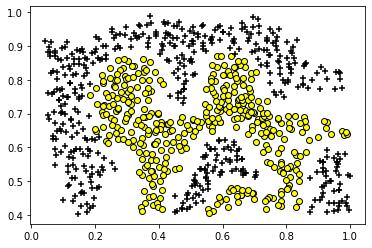

In [24]:
graficoDados(X.reshape(len(X),2),y)

In [25]:
def treinarGaussianSVM(
    X: np.array, 
    y: np.array, 
    C: int, 
    sigma: float
)-> SVC:
    '''
    Vamos usar a função de treino do sklearn para 
    treinar uma SVM com um kernel gaussiano.
    
    Esta função retorna o classificador.
    
    Args:
        X(np.array): Vector de features originais.
        y(np.array): Valores target.
        C(int): Parâmetro de regularização.
        sigma(float): Parâmetro sigma do kernel Gaussiano.

    Returns:
        svm_classifier(SVC): classificador treinado
    '''
    svm_classicador = SVC(kernel = 'rbf', C=C, gamma= np.power(sigma,-2.))
    svm_classicador.fit(X,y.reshape(len(y),))     
    
    return svm_classicador

In [26]:
C = 1
sigma = 0.1
# Treinar e obter modelo 
model = treinarGaussianSVM(X,y,C, sigma)

In [27]:
def visualizarFronteira(
    X: np.array, 
    y: np.array, 
    model:SVC
) -> None:
    """
    Usa o modelo treinado e desenha a fronteira não linear sobre uma
    grelha de diversos valores. Este código foi adaptado do código 
    do utilizado pelo utilizador @dibgerge.
        
    Args:
        X(np.array): Features originais.
        y(np.array): Valores target. 
        model(SVC): TClassificador treinado.
    Returns:
        None
    """
    graficoDados(X, y)

    # Gerar grelha de espaço 2D
    x1plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    x2plot = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
    X1, X2 = np.meshgrid(x1plot, x2plot)

    # Iterar sobre a grelha e prever com base no classificador
    vals = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
        new_X = np.stack((X1[:, i], X2[:, i]), axis=1)
        vals[:, i] = model.predict(new_X)

    plt.contour(X1, X2, vals, colors='y', linewidths=2)
    plt.pcolormesh(X1, X2, vals, cmap='YlGnBu', alpha=0.25, edgecolors='None', lw=0)
    plt.grid(False)

Vamos analisar a fronteira de decisão com base no valor de sigma = 1:

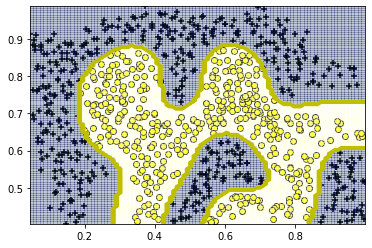

In [28]:
visualizarFronteira(X,y,model)

O kernel gaussiano foi capaz de capturar a natureza não linear dos dados na variável y em respecto a X.
<br>
Vamos analisar outro dataset para visualizar o efeito da regularização e da escolha do kernel:

In [32]:
ex6_ficheiro_3 = io.loadmat('ex6data3.mat')
X = np.array(ex6_ficheiro_3['X'])
y = np.array(ex6_ficheiro_3['y'])

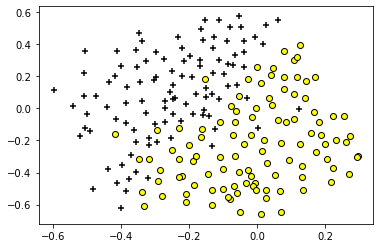

In [33]:
graficoDados(X, y)

O kernel linear deverá, provavelmente, ajustar-se pior do que o kernel gaussiano para estes dados, apesar de termos uma fronteira quasi-linear. 
<br>

Vamos visualizar os dois kernels, começando pelo linear: 

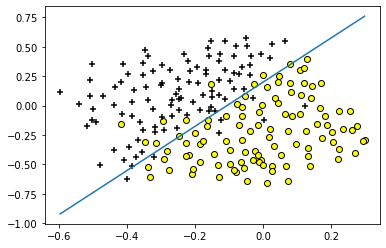

In [37]:
C = 1
w,b = treinarSVM(X,y,C,100000)
visualizarFronteiraLinear(X, y, w, b)

O kernel linear não consegue capturar alguns dos efeitos da variável target - principalmente dos casos onde X < 0.2 e Y > X. 
<br>
**Queremos utlizar um kernel que seja capaz de aprender este nível de não-linearidade.**
<br>
<br>
**Vamos ver a fronteira gerada por um kernel gaussiano, para o mesmo lambda:**

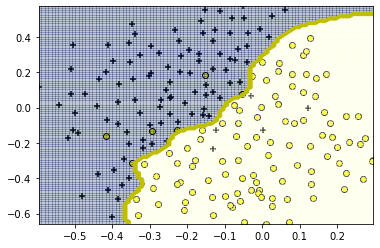

In [39]:
C = 1
sigma = 0.1
model = treinarGaussianSVM(X,y,C, sigma)
visualizarFronteira(X,y,model)

Em conclusão - as máquinas de vector suporte são boas alternativas às regressões quando estamos a lidar com efeitos não lineares na variável target. Este tipo de modelos, especialmente os kernels não lineares, são computacionalmente caros e podem demorar demasiado tempo a convergir para datasets não-lineares.